This following A Karpathy's "The spelled-out intro to neural networks and backpropagation: building micrograd" from YouTube: https://www.youtube.com/watch?v=VMj-3S1tku0

In [183]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [184]:
h=0.0001

a=2.0
b=-3.0
c=10.0

d1=a*b+c
c+=h
d2=a*b+c

print('d1',d1)
print('d2',d2)
print('slope',(d2-d1)/h)

d1 4.0
d2 4.0001
slope 0.9999999999976694


In [185]:
class Value:
    def __init__(self,data,_children=(),_op='',label='') -> None:
        self.data=data
        self.grad=0 
        self._backward=lambda: None
        self._prev=set(_children)
        self._op=_op
        self.label=label

    def __repr__(self) -> str:
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        out=Value(self.data+other.data,(self,other),'+')

        def _backward():
            self.grad=1.0*out.grad
            other.grad=1.0*out.grad
        out._backward=_backward()

        return out
    
    def __mul__(self,other):
        out=Value(self.data*other.data,(self,other),'*')

        def _backward():
            self.grad=other.data*out.grad
            other.grad=self.data*out.grad
        out._backward=_backward()

        return out
    
    # we will use tanh as the activation function
    def tanh(self):
        x=self.data
        t=(math.exp(2*x)-1)/(math.exp(2*x)+1)
        out=Value(t,(self,),'tanh')

        def _backward():
            self.grad=(1-t**2)*out.grad
        _backward=_backward()

        return out
    
a=Value(2.0,label='a')
b=Value(-3.0,label='b')
c=Value(10.0,label='c')
e=a*b; e.label='e'
d=e+c; d.label='d'
f=Value(-2.0,label='f')
L=d*f; L.label='L'
L


Value(data=-8.0)

In [186]:
from graphviz import Digraph

def trace(root):
    nodes, edges=set(),set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child,v))
                build(child)
    build(root)
    return nodes,edges

def draw_dot(root):
    dot=Digraph(format='svg',graph_attr={'rankdir': 'LR'}) #LR = left to Right

    nodes,edges=trace(root)
    for n in nodes:
        uid=str(id(n))
        # create a rectangular 'record' node
        dot.node(name=uid,label="{%s | data %.2f | grad %.4f}" % (n.label,n.data,n.grad),shape='record')
        if n._op:
            # create an op node
            dot.node(name=uid + n._op,label=n._op)
            # connect node to it
            dot.edge(uid+n._op,uid)
    
    for n1,n2 in edges:
        # connect n1 to op node n2
        dot.edge(str(id(n1)),str(id(n2))+n2._op)
    
    return dot


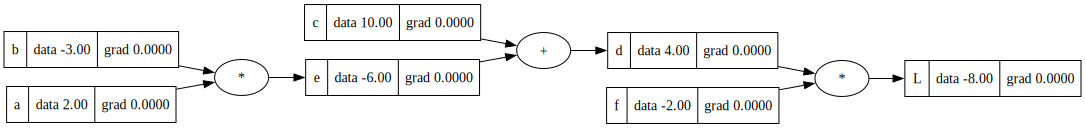

In [187]:
draw_dot(L)

In [188]:
c.grad=-2.0
e.grad=-2.0

In [189]:
def lol():
    
    h=0.001
    
    a=Value(2.0,label='a')
    b=Value(-3.0,label='b')
    c=Value(10.0,label='c')
    e=a*b; e.label='e'
    d=e+c; d.label='d'
    f=Value(-2.0,label='f')
    L=d*f; L.label='L'
    L1=L.data

    a=Value(2.0,label='a')
    b=Value(-3.0,label='b')
    c=Value(10.0,label='c')
    c.data+=h
    e=a*b; e.label='e'
    d=e+c; d.label='d'
    f=Value(-2.0,label='f')
    L=d*f; L.label='L'
    L2=L.data

    print((L2-L1)/h)

lol()

-1.9999999999988916


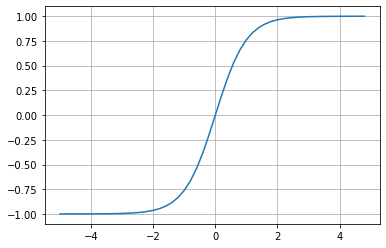

In [190]:
# tanh will be used as the activation function
plt.plot(np.arange(-5,5,0.2),np.tanh(np.arange(-5,5,0.2)));plt.grid();

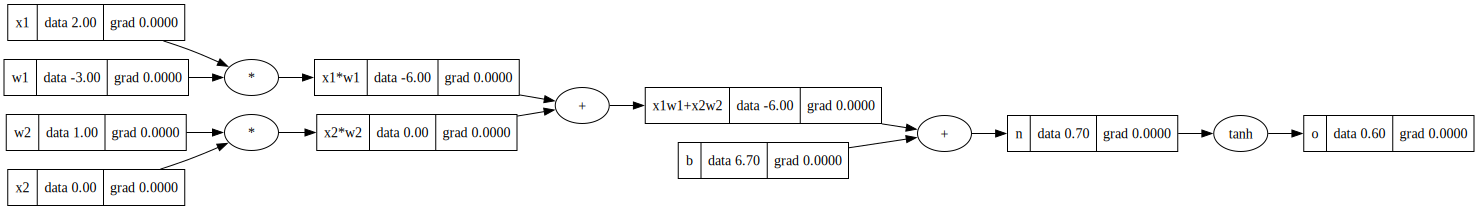

In [191]:
# inputs 
x1=Value(2.0,label='x1')
x2=Value(0.0,label='x2')
# weights
w1=Value(-3.0,label='w1')
w2=Value(1.0,label='w2')
# bias
b=Value(6.7,label='b')
# n, the raw output at neuron x1w1+x2w2+b, before 
# passing it throught the activation function
x1w1=x1*w1; x1w1.label='x1*w1'
x2w2=x2*w2; x2w2.label='x2*w2'
x1w1x2w2=x1w1+x2w2; x1w1x2w2.label='x1w1+x2w2'
n=x1w1x2w2+b; n.label='n'
# pass n through activation function tanh
o=n.tanh(); o.label='o'

draw_dot(o)

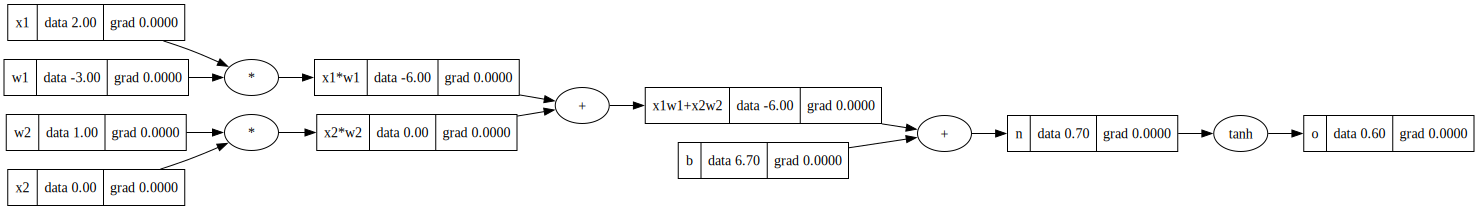

In [192]:
draw_dot(o)

In [193]:
x1.grad=w1.data*x1w1.grad
w1.grad=x1.data*x1w1.grad

In [194]:
x2.grad=w2.data*x2w2.grad
w2.grad=x2.data*x2w2.grad

In [195]:
x1w1.grad=0.5
x2w2.grad=0.5

In [196]:
x1w1x2w2.grad=0.5
b.grad=0.5

In [197]:
n.grad=0.5

In [198]:
o.grad=1.0